In [1]:
import sys
sys.path.append("..")  # Ensure project root is found

# Import configurations
from configs.plot_config import apply_plot_settings
from configs.math_functions import F
from configs.parameters import *
from configs.filenames import *

import numpy as np
import os

C = float(os.getenv("C", C))
sig = float(os.getenv("sig", sig))
itr = int(os.getenv("itr", itr))

print(f"\n📢 Using parameters: C={C}, sig={sig}, itr={itr}")


📢 Using parameters: C=0.01, sig=0.12, itr=20000


In [2]:
output_dir = "../data/"

params = get_params_for_filename(param_keys, globals())
filename = get_filename("discrete", "WCM", **params)
savefile = os.path.join(output_dir, filename)
print(f"✅ Opened {savefile}")

data = np.load(savefile, allow_pickle=True)      
t, EE, II = data[:,0], data[:,1], data[:,2]

✅ Opened ../data/WCM_DISCRETE_delay_itr=20000_dt=0.005_tau=1_wee=20_wei=21_wie=16_wii=6_ie=1.5_ii=-0.5_E0=0_I0=0.npy


In [3]:
EEII = np.array([EE[::-1], II[::-1]])

# Initialize ZEZI array
ZEZI = np.zeros((2, len(t)))
ZEZI[:, 0] = [ZE1, ZI1]  # Assign initial values directly

# Vectorized computation loop
for n in range(len(t) - 1):
    F_E0 = F(EEII[0, n])
    F_E1 = F(EEII[1, n])
    common_factor_0 = F_E0 * (1 - F_E0)
    common_factor_1 = F_E1 * (1 - F_E1)
 
    ZEZI[:, n + 1] = ZEZI[:, n] + dt * np.array([
        -ZEZI[0, n] + ZEZI[0, n - d] * wee * common_factor_0 + ZEZI[1, n - d] * wie * common_factor_0,
        -ZEZI[1, n] - ZEZI[0, n - d] * wei * common_factor_1 - ZEZI[1, n - d] * wii * common_factor_1
    ])

# Reverse ZE and ZI once at the end
ZE, ZI = ZEZI[:, ::-1]

# Stack data efficiently
data = np.column_stack((t, ZE, ZI))

params = get_params_for_filename(param_keys, globals())
filename = get_filename("discrete", "PRC", **params)
savefile = os.path.join(output_dir, filename)
np.save(savefile, data, allow_pickle=True)

print(f"✅ Data saved to {savefile}")

✅ Data saved to ../data/PRC_WCM_DISCRETE_delay_itr=20000_dt=0.005_tau=1_wee=20_wei=21_wie=16_wii=6_ie=1.5_ii=-0.5_ZE1=-5_ZI1=1.npy


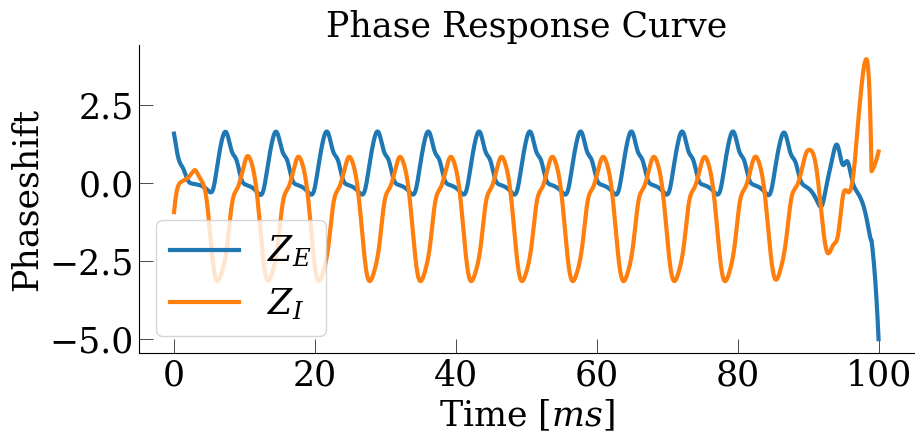

In [4]:
import matplotlib.pyplot as plt
from configs.plot_config import apply_plot_settings
apply_plot_settings()

data = np.load(savefile, allow_pickle=True)      
t, ZE, ZI = data[:,0], data[:,1], data[:,2]

fig, ax = plt.subplots(figsize=(10, 4))  # Explicitly define figure size

ax.plot(t, ZE, linewidth=3, label = '$Z_E$')
ax.plot(t, ZI, linewidth=3, label = '$Z_I$')
ax.set_xlabel('Time $[ms]$')
ax.set_ylabel('Phaseshift')
ax.set_title('Phase Response Curve')
ax.legend()

plt.show()